# <center>TMDb Movie Data Analysis </center>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

</br><font color='blue'>In this project, we will be analyzing data associated with 10,000 movies collected from The Movie Database (TMDb). 
The analysis will be driven by the following question: <b><i>What affects the amount of money (either revenue or profit) a movie makes?</i></b>

We'll dive into the questions mentioned below:
1. How many movies have been released per year?
2. How are the profit versus the profit average trending over the years?
3. What genre of movie is the most recurrent?
4. What genre of movie drives the higher revenue and the higher profit? Are they the same?
5. What movie generated the highest revenue and got the highest profit?
6. Which keyword stands out among all of them? What does the revenue associated with the keyword look like?
7. Who are the most and least profitable actors?
8. What studios were the most and the least profitable in 2015?
9. Overview of the studios that work with the same actors.
10. What is the best month to release a movie based on the profit?

We will be interested in finding trends among production, cast, and revenue/budget. That's why we'll look into how many movies are made in each year for example.
</font>


In [1]:
# Import all needed packages.

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import csv

% matplotlib inline
sns.set_style(style="darkgrid")

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loads movie dataset and display the first rows to get an idea of what data are included in it.
df = pd.read_csv('tmdb-movies.csv')
pd.options.display.max_columns = None
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# The label of the column are quite clear enough, I don't think it would make sense to include a description of each column. 
# Besides, all columns are not needed, so we will need to drop some of them later.

In [4]:
# Allows us to get the number of rows and columns.
df.shape

(10866, 21)

<font color='blue'>There are 10,866 movies and 21 columns.</font>

In [5]:
# Gives us some summary statistics in order to understand our data and identify any changes we'll have to make.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# We can see where the missing data are located.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<font color='blue'>Data are missing in the following colums. "imdb_id", "cast", "homepage", "director", "tagline", "keywords", "overview", "genres" and "production_companies". </font>

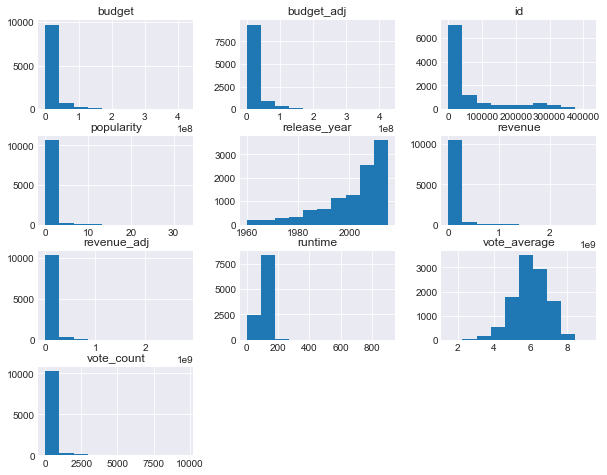

In [7]:
# Shows attribute distributions. 
df.hist(figsize=(10,8));

### Data Cleaning 

In [8]:
# Shows the duplicated data.
df[df.duplicated(['id'], keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
# Deletes duplicated row
df.drop(labels=2090, axis=0, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [11]:
# Deletes the columns I won't be using because they shouldn't be useful in the analysis.
df.drop(['imdb_id','popularity','budget','revenue','homepage','tagline','overview', 'runtime','vote_count'], axis=1, inplace=True)

In [12]:
# Gets an idea of what the new dataset looks like.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
id                      10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [13]:
# Deletes rows that don't include all data.
df.dropna(how= 'any', inplace=True)

# Overview of the remaining data.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 10865
Data columns (total 12 columns):
id                      8666 non-null int64
original_title          8666 non-null object
cast                    8666 non-null object
director                8666 non-null object
keywords                8666 non-null object
genres                  8666 non-null object
production_companies    8666 non-null object
release_date            8666 non-null object
vote_average            8666 non-null float64
release_year            8666 non-null int64
budget_adj              8666 non-null float64
revenue_adj             8666 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 880.1+ KB


In [14]:
# Saves new clean dataset for next section
df.to_csv('data_tmdb.csv', index=False)

In [15]:
df.describe()

,id,vote_average,release_year,budget_adj,revenue_adj
count,8666.000000,8666.000000,8666.000000,8.666000e+03,8.666000e+03
mean,57003.179206,6.003612,2000.129818,2.130749e+07,6.362440e+07
std,86242.565745,0.893539,13.221278,3.710269e+07,1.592874e+08
min,5.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9816.750000,5.500000,1993.000000,0.000000e+00,0.000000e+00
50%,16216.500000,6.100000,2004.000000,2.130703e+06,1.891237e+05
75%,54003.000000,6.600000,2011.000000,2.810466e+07,5.524857e+07
max,417859.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


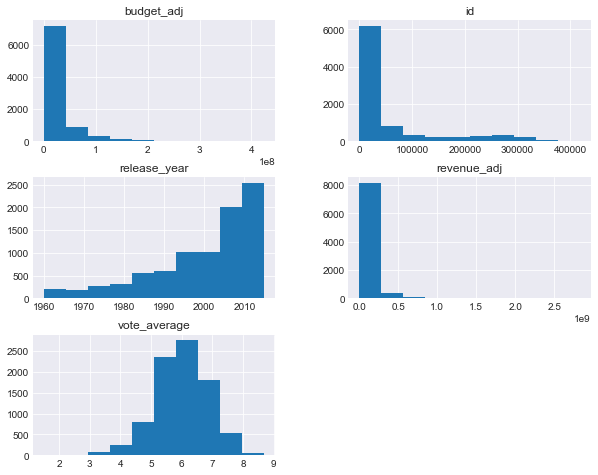

In [16]:
df.hist(figsize=(10,8));

In [17]:
# Shortens the column names for a better readability.
df = df.rename(columns = {'original_title':'movie','production_companies':'studio','vote_average': 'rating', 'release_date': 'dates', 'release_year':'year', 'budget_adj':'budget','revenue_adj':'revenue'})

In [18]:
# Gets column names in lowercase.
df.columns = df.columns.str.lower()

In [19]:
# Saves new clean datasets for next section.
df.to_csv('data_tmdb.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis



### Q1: How many movies have been released per year?

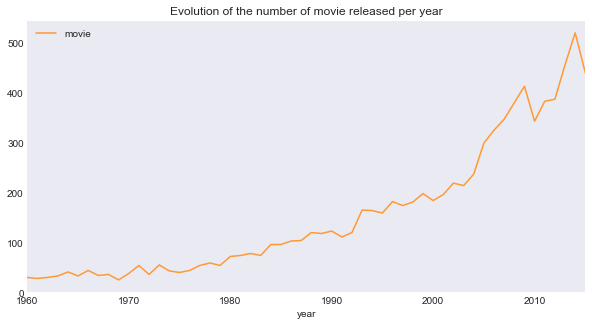

In [22]:
# Shows the number of movies released per year.
all_year_movie = df.groupby('year')['movie'].count()

ax3= all_year_movie.plot(figsize=(10,5), y='Number of movies', x='Year', color= '#FF9933', title='Evolution of the number of movie released per year')

# Turns off grid on the left Axis.
ax3.grid(False)

plt.legend();

<font color='blue'>The number of movies released per year has been increasing. This is not surprising as there are more resources for the filmmakers (new technologies = more creativity, more innovation etc.)
Thanks to the new technologies, it's easier and cheaper to make movies, and then distribute them.</font>

### Q2: How are the profit versus the profit average trending over the years?

In [23]:
# Calculate profit
all_year_profit = df.groupby('year')['revenue'].sum() - df.groupby('year')['budget'].sum()

# Calculate profit avg
all_year_profitavg = (df.groupby('year')['revenue'].sum() - df.groupby('year')['budget'].sum()) / df.groupby('year')['movie'].count()

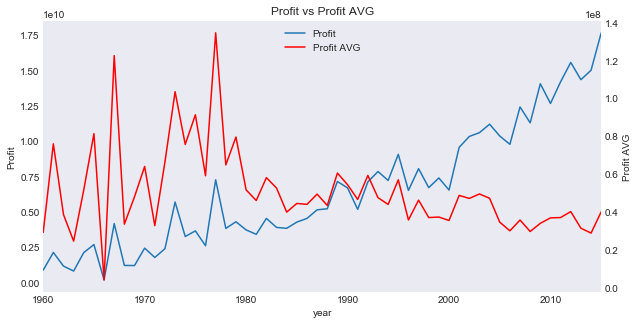

In [24]:
fig = plt.figure() # Creates matplotlib figure

ax = fig.add_subplot(111) # Creates matplotlib axes
ax2 = ax.twinx() # Creates another axes that shares the same x-axis as ax.

width = 0.4

profit = all_year_profit.plot(kind='line', figsize=(10,5), ax=ax, label='Profit', title='Profit vs Profit AVG')
profit_avg = all_year_profitavg.plot(kind='line', color= '#ff0000', figsize=(10,5), ax=ax2, label='Profit AVG')

ax.set_ylabel('Profit')
ax2.set_ylabel('Profit AVG')

# Turns off grid on the left Axis.
ax.grid(False)

# Turns off grid on the secondary (right) Axis.
ax2.grid(False)

# Creates legend with labels.
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=9)

plt.show()

<font color='blue'>Since there are more movies to be released over the years, the average of profit made is decreasing. </font>

### Q3: What genre of movie is the most recurrent? 

In [25]:
# Counts the number of genres and how many times it's recurrent.
# Returns the first value as we can consider the first genre is the main one.
genre_count = df['genres']=df.genres.str.split('|', expand=True)[0]
genre_count = df['genres'].value_counts().head(10)
genre_count

Drama          1980
Comedy         1849
Action         1334
Horror          738
Adventure       511
Thriller        405
Crime           341
Animation       287
Fantasy         225
Documentary     225
Name: genres, dtype: int64

<font color='blue'>There are more movies released in the Drama, Comedy, and Action genres. </font>

Text(0.5,1,'Repartition of genres')

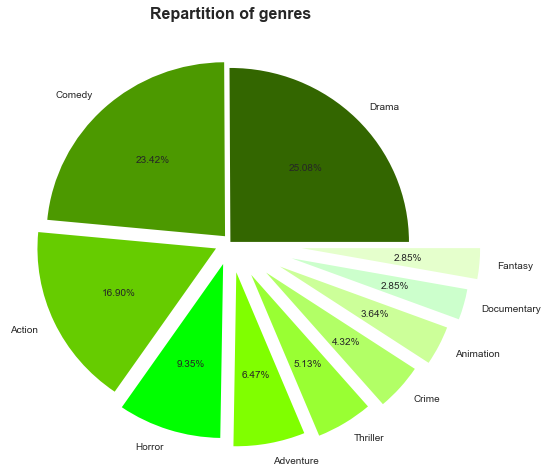

In [26]:
# Shows the repartition of the genres with a pie chart.
explode = np.linspace(0,0.4,10)
colors = ['#336600', '#4C9900', '#66CC00','#00FF00', '#80FF00', '#99FF33', '#B2FF66', '#CCFF99', '#CCFFCC', '#E5FFCC']
genre_count.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), explode=explode,colors = colors)
plt.ylabel('')
plt.title('Repartition of genres', weight='bold', fontsize=16)

### Q4: What genre of movie drives the higher revenue and the higher profit? Are they the same?


In [27]:
# Formats revenue data
df.revenue.astype(float)
pd.options.display.float_format = '{:,.0f}'.format

In [28]:
# Imports dataset
df = pd.read_csv('data_tmdb.csv')

In [29]:
# Calculates profit and adds new column into the dataset
df['profit'] = df['revenue'] - df['budget']

In [30]:
# Shows that the new column is well integrated to the dataset.
df.columns

Index(['id', 'movie', 'cast', 'director', 'keywords', 'genres', 'studio',
       'dates', 'rating', 'year', 'budget', 'revenue', 'profit'],
      dtype='object')

In [31]:
# Saves new clean datasets for next section
df.to_csv('data_tmdb.csv', index=False)

In [32]:
# Extracts first value separated with pipes from the cell
genre_profit = df['genres']=df.genres.str.split('|', expand=True)[0]

In [33]:
# Calculates profit per genre
genre_profit = df.groupby('genres')['profit'].sum().sort_values(ascending=False)
genre_profit

genres
Action            71,262,963,482
Adventure         68,828,824,221
Comedy            59,235,673,029
Drama             55,854,046,482
Animation         21,791,192,878
Horror            15,399,531,420
Fantasy           15,110,085,649
Science Fiction   14,737,746,755
Crime             11,601,007,455
Thriller           8,657,520,825
Family             8,299,495,770
Romance            6,497,633,815
Music              2,414,141,127
Mystery            2,178,263,139
History            1,870,703,792
War                1,367,587,279
Western              893,666,072
Documentary          683,340,306
TV Movie              34,943,339
Foreign                        0
Name: profit, dtype: float64

In [34]:
# In order to make sure that the above results are accurate, we're calculating the budget and revenue per genre.

# Calculates budget per genre
# genre_budget = df.groupby('genres')['budget'].sum().sort_values(ascending=False)

# Calculates revenue per genre
# genre_revenue = df.groupby('genres')['revenue'].sum().sort_values(ascending=False)

#We can confirm the profit data are correct: action revenue-action budget = action profit

In [35]:
# New queries sorted by alphabetical order to build a chart .
genre_count2 = df['genres']=df.genres.str.split('|', expand=True)[0]
genre_count2 = df['genres'].value_counts()
genre_count2.sort_index(inplace=True)

In [36]:
genre_profit2 = df['genres']=df.genres.str.split('|', expand=True)[0]
genre_profit2 = df.groupby('genres')['profit'].sum()
genre_profit2.sort_index(inplace=True)

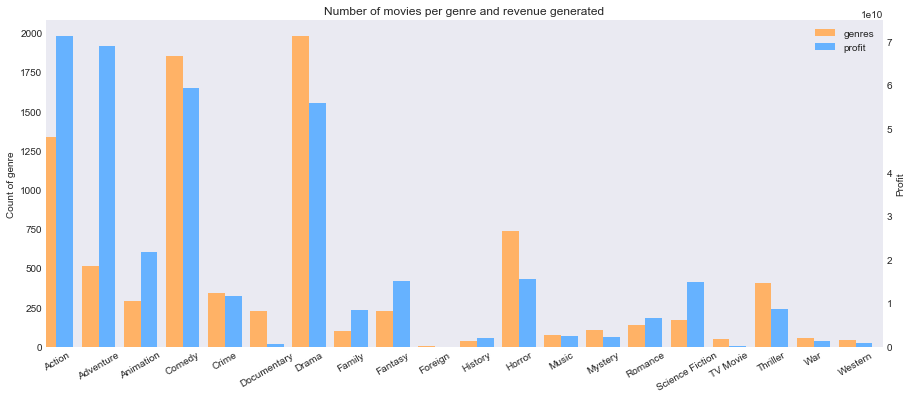

In [37]:
fig = plt.figure() # Creates matplotlib figure

ax = fig.add_subplot(111) # Creates matplotlib axes
ax2 = ax.twinx() # Creates another axes that shares the same x-axis as ax.

width = 0.4

genre_count2.plot(figsize = (15,6), kind='bar', color='#FFB266', ax=ax, width=width, position=1, title='Number of movies per genre and revenue generated')
genre_profit2.plot(figsize = (15,6), kind='bar', color='#66B2FF', ax=ax2, width=width, position=0)

ax.set_ylabel('Count of genre')
ax2.set_ylabel('Profit')

# Turns off grid on the left Axis.
ax.grid(False)

# Turns off grid on the secondary (right) Axis.
ax2.grid(False)

ax.set_xticklabels(genre_count2.index, rotation=30)

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=1)
plt.show()


<font color='blue'>While Drama is the most recurrent genre, the chart shows us that it's not the genre that drives the most profit. The action movies generate a higher profit. </font>

### Q5: What movie generated the highest revenue and got the highest profit?

In [38]:
# Gives revenue per movie
movie_revenue = df[['movie', 'revenue']].sort_values('revenue', ascending = False).head(5)
movie_revenue.sort_values('movie',inplace=True)
print(movie_revenue)

             movie       revenue
1014        Avatar 2,827,123,750
7688          Jaws 1,907,005,842
960      Star Wars 2,789,712,242
8413  The Exorcist 2,167,324,901
3911       Titanic 2,506,405,735


In [39]:
# Gives profit per movie
movie_profit = df[['movie', 'profit']].sort_values('profit', ascending = False).head(5)
movie_profit.sort_values('movie',inplace=True)
print(movie_profit)

             movie        profit
1014        Avatar 2,586,236,848
7688          Jaws 1,878,643,094
960      Star Wars 2,750,136,651
8413  The Exorcist 2,128,035,625
3911       Titanic 2,234,713,671


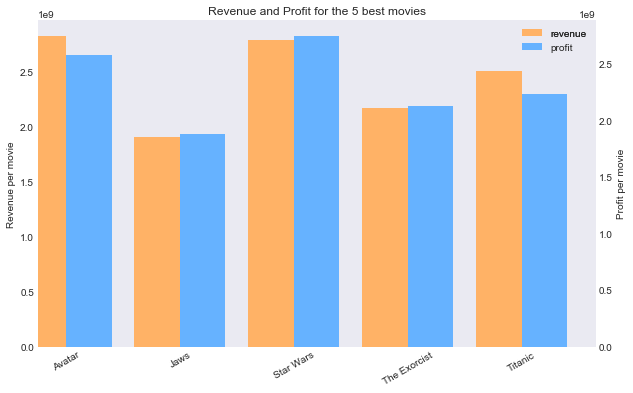

In [40]:
fig = plt.figure() # Creates matplotlib figure

ax = fig.add_subplot(111) # Creates matplotlib axes
ax2 = ax.twinx() # Creates another axes that shares the same x-axis as ax.

width = 0.4

movie_revenue.plot(figsize = (10,6), kind='bar', color='#FFB266', ax=ax, width=width, position=1, title='Revenue and Profit for the 5 best movies')
movie_profit.plot(figsize = (10,6), kind='bar', color='#66B2FF', ax=ax2, width=width, position=0)

# Turns off grid on the left Axis.
ax.grid(False)

# Turns off grid on the secondary (right) Axis.
ax2.grid(False)

ax.set_ylabel('Revenue per movie')
ax2.set_ylabel('Profit per movie')

ax.set_xticklabels(movie_revenue["movie"], rotation=30)

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=1)
plt.show()

<font color='blue'> While Avatar generated the highest revenue, its profit is lower. This is also the case for Titanic. In addition, Star wars has the higher profit.</font>

### Q6: Which keyword stands out among all of them? What does the revenue associated with the keyword look like?

In [41]:
# Returns the first keyword of the cell and counts the recurrence.
kw_count = df['keywords']=df.keywords.str.split('|', expand=True)[0]
kw_count = df['keywords'].value_counts()
kw_count.head()

new york          134
based on novel    121
sex               115
london            108
prison            107
Name: keywords, dtype: int64

In [43]:
# Returns the list of keywords to fill in the wordcloud.
kw_list = df['keywords']=df.keywords.str.split('|', expand=True)[0]
kw_list = df['keywords'].value_counts().index.tolist()
kw_list

['new york',
 'based on novel',
 'sex',
 'london',
 'prison',
 'independent film',
 'suicide',
 'woman director',
 'holiday',
 'female nudity',
 'paris',
 'biography',
 'sport',
 'brother brother relationship',
 'musical',
 'corruption',
 'gay',
 'male nudity',
 'father-son relationship',
 'suspense',
 'england',
 'witch',
 'monster',
 'martial arts',
 'competition',
 'saving the world',
 'rape',
 'alcohol',
 'detective',
 'robbery',
 'dancing',
 'sheriff',
 'california',
 'usa',
 'dc comics',
 'vampire',
 'world war ii',
 'cia',
 'high school',
 'prostitute',
 'africa',
 'spy',
 'jealousy',
 'baseball',
 'bomb',
 'journalist',
 'hotel',
 'japan',
 'baby',
 'individual',
 'mexico',
 'american football',
 'beach',
 'assassin',
 'duringcreditsstinger',
 'italy',
 'love triangle',
 'sister sister relationship',
 'dystopia',
 'adultery',
 'terror',
 'chicago',
 'secret',
 'underdog',
 'wife husband relationship',
 'black people',
 'terrorist',
 'gambling',
 'ocean',
 'flying',
 'san franci

In [44]:
# Returns the revenue associated by keyword.
kw_revenue = df.groupby('keywords')['revenue'].sum().sort_values(ascending=False)
kw_revenue.head()

keywords
saving the world   14,957,899,075
based on novel     13,002,152,525
london             10,229,374,594
new york            8,886,577,718
paris               7,917,745,167
Name: revenue, dtype: float64

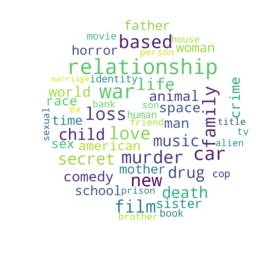

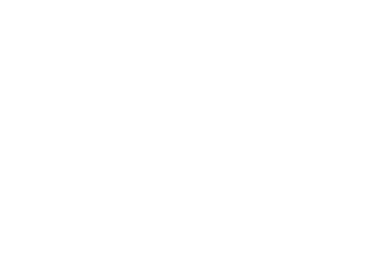

In [45]:
from subprocess import check_output
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from os import path
import csv

from collections import defaultdict
import locale
locale.setlocale(locale.LC_ALL, '')

# mpl.rcParams['figure.figsize']=(8.0,6.0)   
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100              
mpl.rcParams['figure.subplot.bottom']=.1 

round_mask = np.array(Image.open("mask.png"))
df = pd.read_csv('data_tmdb.csv')

wordcloud = WordCloud(
                          background_color='white',
                          mask=round_mask,
                          max_words=50,
                          max_font_size=70, 
                          random_state=42
                         ).generate(' '.join(kw_list))

# Store to file
wordcloud.to_file(path.join("generatedwc.png"))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()

<font color='blue'> What's surprising is none of the 5 most recurrent keywords (even driving the most revenue) are associated to the 5 best movies. However, we can point out that we return only the first keyword of the cell and not all of them.</font>

### Q7: Who are the most and least profitable actors?

In [46]:
# Returns the profit generated per actor.
actor_most_profit = df['cast']=df.cast.str.split('|', expand=True)[0]
actor_most_profit = df.groupby('cast')['profit'].sum().where(df.groupby('cast')['movie'].count() > 14).sort_values(ascending=False)
actor_most_profit.head(10)

cast
Tom Hanks            7,717,644,751
Tom Cruise           7,376,906,425
Harrison Ford        6,546,580,999
Sean Connery         5,126,339,565
Sylvester Stallone   4,486,906,503
Sandra Bullock       4,367,334,596
Will Smith           4,210,883,386
Johnny Depp          4,036,354,456
Ben Stiller          4,026,603,470
Bruce Willis         3,792,761,142
Name: profit, dtype: float64

In [47]:
actor_least_profit = df['cast']=df.cast.str.split('|', expand=True)[0]
actor_least_profit = df.groupby('cast')['profit'].sum().where(df.groupby('cast')['movie'].count() > 14).sort_values(ascending=True)
actor_least_profit.head(10)

cast
Vincent Price            10,613,378
Ethan Hawke              97,556,825
Michael Caine            98,148,308
Colin Farrell           138,853,541
Samuel L. Jackson       199,066,515
Steven Seagal           204,437,075
Jason Statham           219,642,538
John Wayne              230,566,629
Chevy Chase             292,284,661
Jean-Claude Van Damme   296,133,797
Name: profit, dtype: float64

In [48]:
# Returns the number of movie per actor.
movie_per_actor = df['cast']=df.cast.str.split('|', expand=True)[0]
movie_per_actor = df.groupby('cast')['movie'].count().sort_values(ascending=False)
movie_per_actor.head(10)

cast
Nicolas Cage          48
Robert De Niro        39
Bruce Willis          39
Clint Eastwood        38
Tom Hanks             37
Johnny Depp           37
Sylvester Stallone    33
Denzel Washington     33
John Travolta         33
Tom Cruise            31
Name: movie, dtype: int64

In [49]:
# Returns the profit average per actor.
profitavg_per_actor = (actor_most_profit / movie_per_actor ).sort_values(ascending=False).head(10)
profitavg_per_actor

cast
Will Smith       263,180,212
Tom Cruise       237,964,723
Harrison Ford    233,806,464
Tom Hanks        208,584,993
Sean Connery     183,083,556
Sandra Bullock   181,972,275
Elijah Wood      172,457,717
Ben Stiller      167,775,145
Jim Carrey       150,937,832
Julia Roberts    148,520,885
dtype: float64

Text(0.5,1,'Repartition of the profit avg per actor')

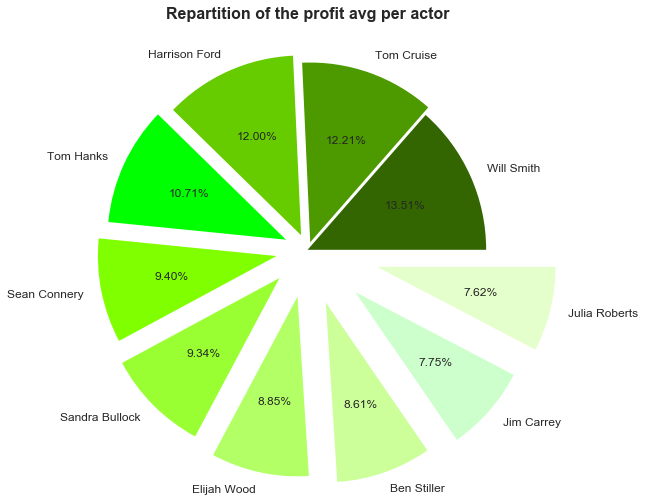

In [50]:
# Shows the repartition of the profit average per actor with a pie chart.
explode = np.linspace(0,0.4,10)
colors = ['#336600', '#4C9900', '#66CC00','#00FF00', '#80FF00', '#99FF33', '#B2FF66', '#CCFF99', '#CCFFCC', '#E5FFCC']
profitavg_per_actor.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), explode=explode,colors = colors)
plt.ylabel('')
plt.title('Repartition of the profit avg per actor', weight='bold', fontsize=16)

<font color='blue'> Most of the actors who have generated the highest revenues are also the ones who have the higher revenue average. 
It's interesting to notice that Harisson Ford, who is in the list, played in one of the 5 best movies: Star Wars.
It makes sense because all actors included in the list are pretty 'young' and 3 of the best movies have been released in the 70's.</font>

### Q8: What studios were the most and the least profitable in 2015?

In [51]:
# Returns the profit generated per studios in 2015.
studio_most_profit = df['studio']=df.studio.str.split('|', expand=True)[0]

In [52]:
studio_most_profit = df.loc[df['year'] == 2015]
studio_most_profit = studio_most_profit.groupby('studio')['profit'].sum().sort_values(ascending=False).head(10)
studio_most_profit

studio
Universal Pictures                       2,853,667,446
Lucasfilm                                1,731,238,382
Twentieth Century Fox Film Corporation   1,455,479,523
Marvel Studios                           1,392,546,283
Paramount Pictures                       1,322,736,610
Columbia Pictures                        1,278,480,701
Universal Studios                        1,254,445,953
Walt Disney Pictures                     1,239,912,744
New Line Cinema                            708,114,662
Regency Enterprises                        581,169,316
Name: profit, dtype: float64

Text(0.5,1,'Most profitable studios')

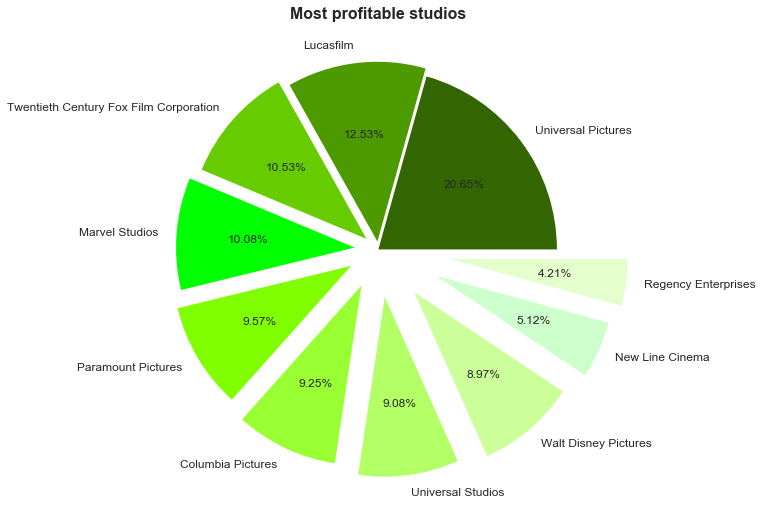

In [53]:
# Displays the repartition of the most profitable studios with a pie chart.
explode = np.linspace(0,0.4,10)
colors = ['#336600', '#4C9900', '#66CC00','#00FF00', '#80FF00', '#99FF33', '#B2FF66', '#CCFF99', '#CCFFCC', '#E5FFCC']
studio_most_profit.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), explode=explode,colors = colors)
plt.ylabel('')
plt.title('Most profitable studios', weight='bold', fontsize=16)

In [54]:
studio_least_profit = df['studio']=df.studio.str.split('|', expand=True)[0]

In [55]:
studio_least_profit = df.loc[df['year'] == 2015]
studio_least_profit = studio_least_profit.groupby('studio')['profit'].sum().sort_values(ascending=True).head(10)
studio_least_profit

studio
Happy Madison Productions        -55,199,976
Current Entertainment            -27,599,988
K. JAM Media                     -23,919,989
StudioCanal                      -22,183,287
British Film Institute (BFI)     -19,319,991
Paul Schiff Productions          -18,399,992
Nu Image Films                   -18,399,992
The Safran Company               -18,399,992
Denver and Delilah Productions   -18,208,091
Benaroya Pictures                -13,799,994
Name: profit, dtype: float64

In [56]:
# Returns the number of movies released per studio.
movie_per_studios=df.groupby('studio')['movie'].nunique().sort_values(ascending=False)[0:10]
movie_per_studios

studio
Universal Pictures                        428
Paramount Pictures                        412
Columbia Pictures                         266
Twentieth Century Fox Film Corporation    231
New Line Cinema                           195
Walt Disney Pictures                      189
Warner Bros.                              165
Miramax Films                             129
TriStar Pictures                          120
Columbia Pictures Corporation             115
Name: movie, dtype: int64

Text(0.5,1,'Repartition of the number of movies released per studio')

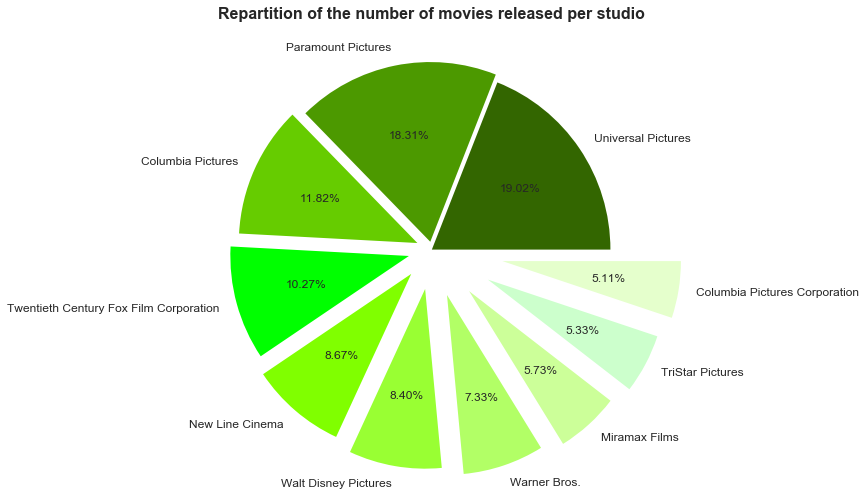

In [57]:
# Shows the repartition of the number of movies released per studio with a pie chart.
explode = np.linspace(0,0.4,10)
colors = ['#336600', '#4C9900', '#66CC00','#00FF00', '#80FF00', '#99FF33', '#B2FF66', '#CCFF99', '#CCFFCC', '#E5FFCC']
movie_per_studios.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), explode=explode,colors = colors)
plt.ylabel('')
plt.title('Repartition of the number of movies released per studio', weight='bold', fontsize=16)

<font color='blue'> Universal Pictures has released the most of movies. Consequently, it has driven the most revenue.
However, Lucasfilm, that is the second to generate the most of revenues, hasn't released most of 115 movies. We might explain it by the fact that Universal Pictures has been created in 1912 and Lucasfilm in 1971.
Lucasfilm released Star Wars. </font>

### Q9: Overview of the studios that work with the same actors.

In [58]:
# Returns the number of times an actor played a movie with a specific studio. 
df.groupby(['cast','studio']).count()['movie'].sort_values(ascending=False)[0:30]

cast                   studio                   
Adam Sandler           Columbia Pictures            13
Clint Eastwood         Malpaso Productions          13
Eddie Murphy           Paramount Pictures           12
Tom Cruise             Paramount Pictures           12
Clint Eastwood         Warner Bros.                 10
John Travolta          Paramount Pictures            9
John Wayne             Paramount Pictures            8
Robert Englund         New Line Cinema               7
Roger Moore            Eon Productions               7
Mark Wahlberg          Paramount Pictures            7
Peter Sellers          United Artists                6
Chevy Chase            Warner Bros.                  6
Harrison Ford          Paramount Pictures            6
Jean-Claude Van Damme  Universal Pictures            6
Sean Connery           Eon Productions               6
Woody Allen            Orion Pictures                6
Steven Seagal          Warner Bros.                  6
Tim Allen       

### Q10: What is the best month to release a movie in terms of profit?

In [59]:
# Returns month of release
df['dates'] = pd.to_datetime(df['dates'])
month = df['month'] = df['dates'].dt.month

In [60]:
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x]).sort_index()

In [61]:
monthly_profit = df.groupby('month')['profit'].sum()
monthly_profit

month
Apr   19,429,190,016
Aug   19,319,436,285
Dec   58,192,867,861
Feb   12,802,657,757
Jan   10,405,715,061
Jul   39,642,010,065
Jun   58,342,836,516
Mar   26,719,373,894
May   42,842,698,721
Nov   39,887,976,856
Oct   22,628,065,975
Sep   16,505,537,827
Name: profit, dtype: float64

In [62]:
monthly_profit = pd.DataFrame(monthly_profit)
monthly_profit

,profit
month,
Apr,"19,429,190,016"
Aug,"19,319,436,285"
Dec,"58,192,867,861"
Feb,"12,802,657,757"
Jan,"10,405,715,061"
Jul,"39,642,010,065"
Jun,"58,342,836,516"
Mar,"26,719,373,894"
May,"42,842,698,721"


In [63]:
# Returns the profit sorted per month
ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_profit2=monthly_profit.reindex(ordered)
monthly_profit2

,profit
month,
Jan,"10,405,715,061"
Feb,"12,802,657,757"
Mar,"26,719,373,894"
Apr,"19,429,190,016"
May,"42,842,698,721"
Jun,"58,342,836,516"
Jul,"39,642,010,065"
Aug,"19,319,436,285"
Sep,"16,505,537,827"


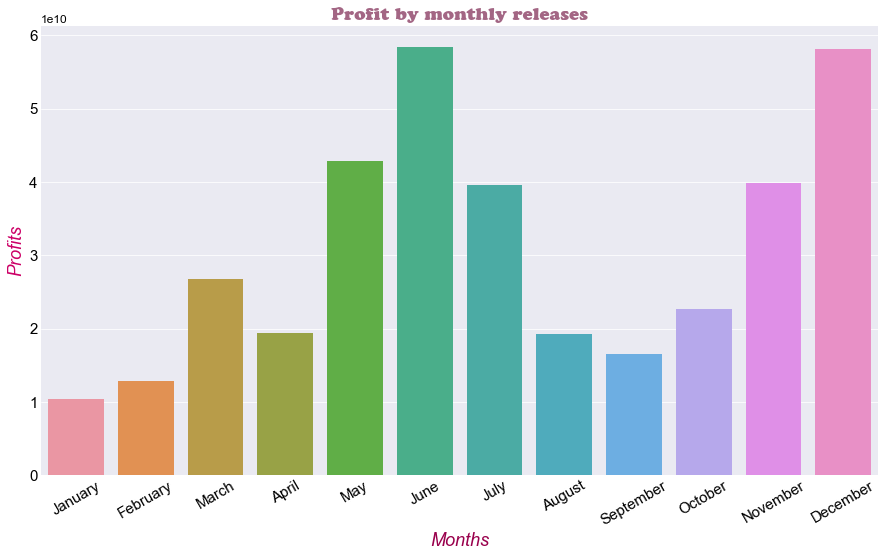

In [64]:
# Creates the chart
monthly_profit_bar = sn.barplot(x = monthly_profit2.index, y = monthly_profit2.profit, data = monthly_profit2)

# Sets the size of the chart
monthly_profit_bar.figure.set_size_inches(15,8)

# Sets titlte
monthly_profit_bar.axes.set_title('Profit by monthly releases',color="#660033", fontsize = 18, alpha = 0.6, fontname="Cooper Std")

# Sets x and y axes
monthly_profit_bar.set_xlabel("Months", color="#99004C", fontsize = 18, style='italic')
monthly_profit_bar.set_ylabel("Profits", color="#CC0066", fontsize = 18, style='italic')

monthly_profit_bar.tick_params(labelsize = 15, labelcolor="black")

month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_profit_bar.set_xticklabels(month_list, rotation = 30, size = 15)

plt.show()

<font color='blue'> June and December appear as the best months to release movies. December is the month of Winter Holidays, so it makes sense.  </font>

<a id='conclusions'></a>
## Conclusions
<font color='blue'>
<br>As a reminder, we tried to answer the following question: ***What affects the amount of money (either revenue or profit) a movie makes?*** <br/>

<br>We could notice that the number of movies released per year has been increasing. We can explain it by the innovation made year over year thanks to the evolution of the new technologies. 
The evolution of the profit follows the same trend, which makes sense because the more movies are released, the more revenue can be generated. As for the profit average, the trend has been reversed since the 80's-90's. 
During the first two decades, we can observe two significant spikes. This can be explained by the fact that there were less movies to be released, so the profit was more volatile.<br/>

<br>Drama, Comedy and Action are the three genres that makes the most movies and the most profit. Except that the Adventure genre is the second one to be profitable, while there has been only a few movies (511) released in this category. This is due to the release of Avatar, which is one of the most profitable movies. As for the Action genre, which is the one to drive the highest profit, this is due to the release of Star Wars.
Indeed, we could point out that the 5 best movies based on revenue and profit are: Avatar, Star Wars, Titanic, Exorcist and Jaws.<br/>

<br>Also, the type of movies that are driving the most revenue are Action and Adventure. This makes sense since Avatar and Star Wars are categorized as Adventure and Action movies.
Besides, the profitable studios have released Action and Adventure movies in 2015 such as Star Wars, Avengers, Furious 7, Jurassic World and Minions.<br/>

<br>Furthermore, we could highlight that the best months to release movies are June and December, thanks to the holidays.<br/>

<br>Finally, it's been interesting to notice that none of the 5 keywords, that generate the higher revenues, have not been used do describe one of the 5 best movies (in terms of revenue). It would make sense to go further into the analysis.<br/> 

<br><strong><mark>LIMITATIONS</mark></strong><br/>

<br>As we noticed earlier, there are some missing values. We had to drop the affected rows. This means that our analysis is not 100% accurate as we haven't been able to analyze the entire dataset.
For example, X and X might not be the most popular genres between 1960 and 2015.<br/>

<br>Also, some cells such as productions (studios), cast, keywords contain several values separated with pipes ("|"). As explained in the analysis above, we extracted the first value only. Thus, the results may not be 100% accurate as we did not include all of them.

</font>



<a id='resources'></a>
## Resources

> Project Walkthrough

> https://stackoverflow.com/questions/47022070/display-all-dataframe-columns-in-a-jupyter-python-notebook<br>
> https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas<br>
> https://stackoverflow.com/questions/20868394/changing-a-specific-column-name-in-pandas-dataframe<br>
> https://stackoverflow.com/questions/7844118/how-to-convert-comma-delimited-string-to-list-in-python<br>
> https://docs.python.org/3/library/locale.html<br>
> https://stackoverflow.com/questions/473099/check-if-a-given-key-already-exists-in-a-dictionary-and-increment-it<br>
> https://www.kaggle.com/adiljadoon/word-cloud-with-python<br>
> https://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis<br>
> https://discuss.analyticsvidhya.com/t/how-to-make-a-text-bold-within-print-statement-in-ipython-notebook/14552/3<br>
> https://python-graph-gallery.com/122-multiple-lines-chart/<br>
> https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html<br>
> https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend <br>
> https://stackoverflow.com/questions/46011940/how-to-plot-two-pandas-time-series-on-same-plot-with-legends-and-secondary-y-axi<br>
> http://leportella.com/cheatlist/2017/11/22/pandas-cheat-list.html,br>
> https://stackoverflow.com/questions/30405413/python-pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not<br>
> https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name<br>
> https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index<br>
> https://www.youtube.com/watch?v=zg2b4GQd2NA <br>
> https://www.wired.com/2014/09/cinema-is-evolving/ <br>
> http://www.nytimes.com/2010/11/14/movies/14dargis.html <br>
> https://stephenfollows.com/how-many-films-are-released-each-year/ <br>
> https://en.wikipedia.org/wiki/Cinema_of_the_United_States<br>


In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'FinalV3_TMDb_Movie_Data_Analysis.ipynb'])

0